# Задача 10.8.8

#  Написание кода

Выберите значение $y_1$ таким образом, чтобы соответствующее решение разностного уравнения

$$
y_{n + 1} = y_n – 1 + 2h (– 2y_n + 1) 
$$

с $y_0 = 1$ стремилось к нулю при $n \rightarrow \infty$. Составьте программу, реализующую численное решение уравнения (7.2) как с найденным значением $y_1$, так и со значением $y_1$, задаваемым формулой $y_1 = 0.5 e^{–2h} + 0.5$. Проанализируйте получающиеся результаты.

Запишем разностную схему в функцию  Iter(). make_graph() отвечает за вывод графика полученного решения на экран.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def Iter(y, n, h):
    return y[n-1] + 2 * h * (1 - 2 * y[n])

def Exact(h):
    a = 0
    b = 1
    N = round((b - a) / h)

    x = np.arange(a, b + h, h)
    z =  np.empty(N + 1)
    
    z[0] = 1
    
    #for x0 in x:
    z = 0.5 * (1 + np.exp(-2 * x))
    
    return [x, z]

In [4]:
def num_solve(Iter, h, y1):
    a = 0
    b = 1
    N = round((b - a) / h)

    y = np.empty(N + 1)
    x = np.arange(a, b + h, h)
    
    y[0] = 1
    y[1] = y1
    
    for n in range(1, N):
        y[n + 1] = Iter(y, n, h)
        
    return [x, y]

In [6]:
def make_graph(Iter, Exact, h, y1, title):
    
    fig = plt.figure(figsize = (12, 9))
    ax = fig.add_subplot(111)
    #plt.plot(arg, val)
    
    l = 2.
    f = 20
    
    # строим решения для данного шага
    num_sol = num_solve(Iter, h, y1)
    ax.plot(num_sol[0], num_sol[1], color="red", linewidth = l, label="h = " + str(h))
        
    ex_sol = Exact(h)    
    ax.plot(ex_sol[0], ex_sol[1], color="blue", linewidth = l, label="Exact solution")
    
    ax.grid(True)
    ax.legend(fontsize = f)
    plt.title(title, fontsize = f)
 
    plt.show() 

Соберем все в одну функцию num_sol() для удобства. Первый параметр - функция, реализующая разностную схему.
Второй - длина шага. Третий - начальное приближение $y_1$. Последний параметр - подпись к графику.



# Анализ работы разностной схемы

Элементарно проверяется, что разностная схема имеет второй порядок аппроксимации уравнения:
    
$$
        u(x)' = 1 - 2 u
$$

Его решение, удовлетворяющее начальным условиям $y_0 = 1$, есть:
$$
    u(x) = \frac{1}{2}\left(1 + e^{-2x}\right)
$$

Сответственно, $y_1$ необходимо задать так, чтобы оно не испортило порядок аппроксимации. Поэтому полагаем, с точностью до членов третьего порядка малости по $h$. То есть:

$$
    y_1 = u(h) = 1 - h + h^2
$$

# Анализ устойчивости

Иследование устойчивости данного многошагового метода применительно к заданной схеме стандартной подстановкой для нахождения собственных чисел
$\xi$ оператора перехода $y_n  = \xi^n$ дает уравнение:
    
$$
    h = f(\xi) =\frac{\xi^2 - 1}{2(1 - 2 \xi)}
$$

Кривая Локуса изображена на рисунке. $f$ голоморфна во внешности единичного круга. Соответственно, достаточно посмотреть на образ любой точки из внешности единичного круга, например $\xi = 2$. Получаем $f(\xi) = -0.5$. Значит, область устойчивости справа от кривой Локуса. То есть разностная задача должна быть устойчивой для любого положительного шага. Стандартно мы анализировали разностную схему для уравнения Далквиста, получаемого как линеаризация исходного. Здесь же не составляет труда исследовать устойчивость и без линаризации, что мы и сделали.


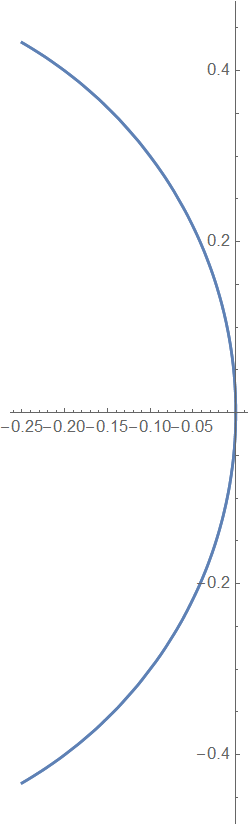

# Решение для верного начального приближения для шагов

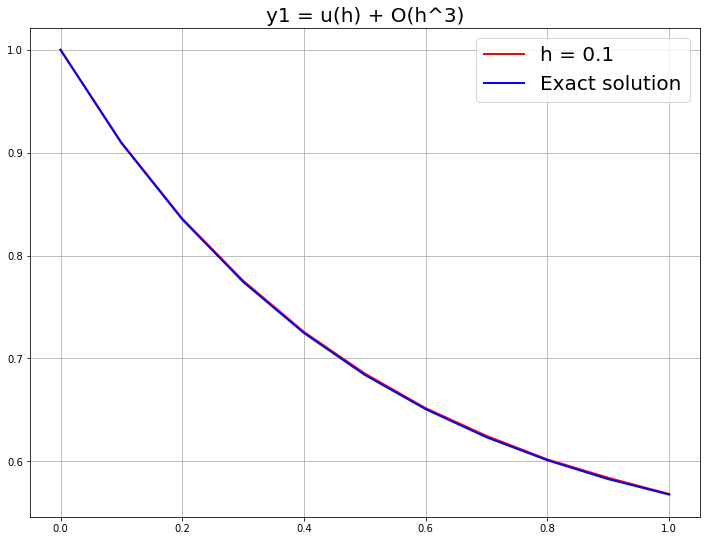

In [5]:
make_graph(Iter, Exact, 0.1, 1 - 0.1 + 0.01, "y1 = u(h) + O(h^3)")

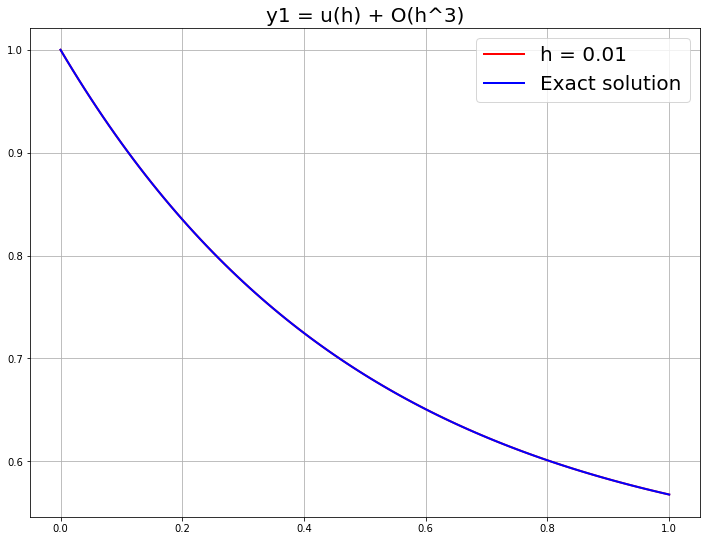

In [6]:
make_graph(Iter, Exact, 0.01, 1 - 0.01 + 0.0001, "y1 = u(h) + O(h^3)")

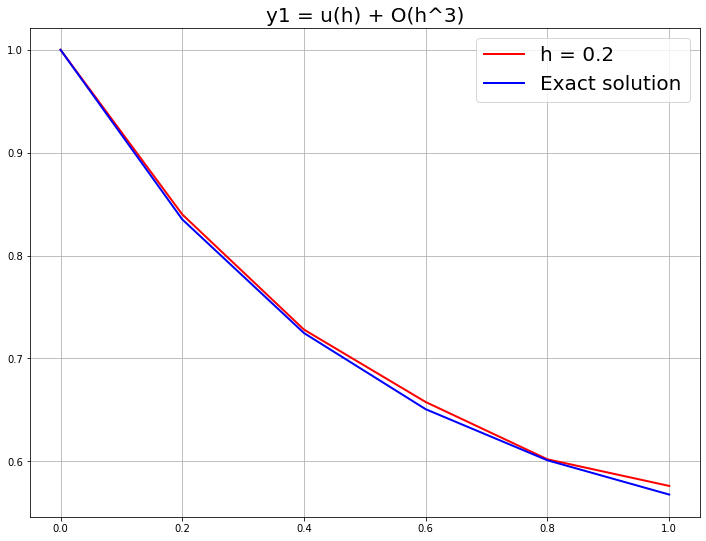

In [7]:
make_graph(Iter, Exact, 0.2, 1 - 0.2 + 0.04, "y1 = u(h) + O(h^3)")

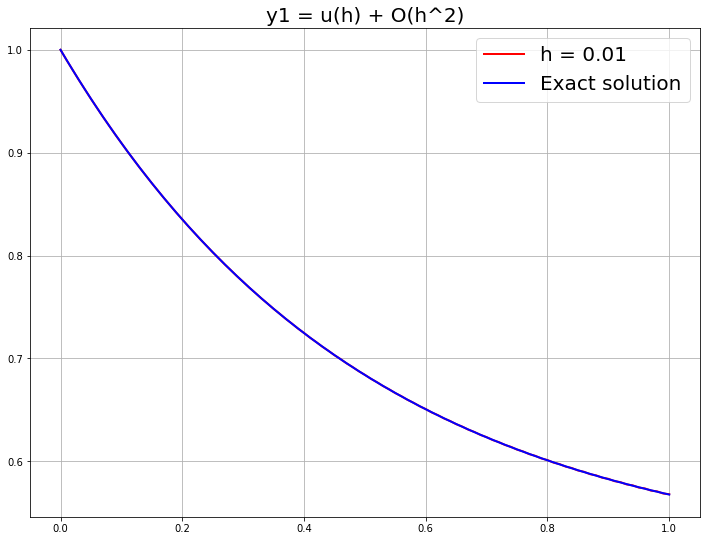

In [8]:
make_graph(Iter, Exact, 0.01, 1 - 0.01, "y1 = u(h) + O(h^2)")

Что интересно, и для $h = 0.1$  при задании $y_1$ без учета квадратичного слагаемого решение
все равно разваливается в конце промежутка. Тем более, и при более крупном шаге. Графики приведены ниже

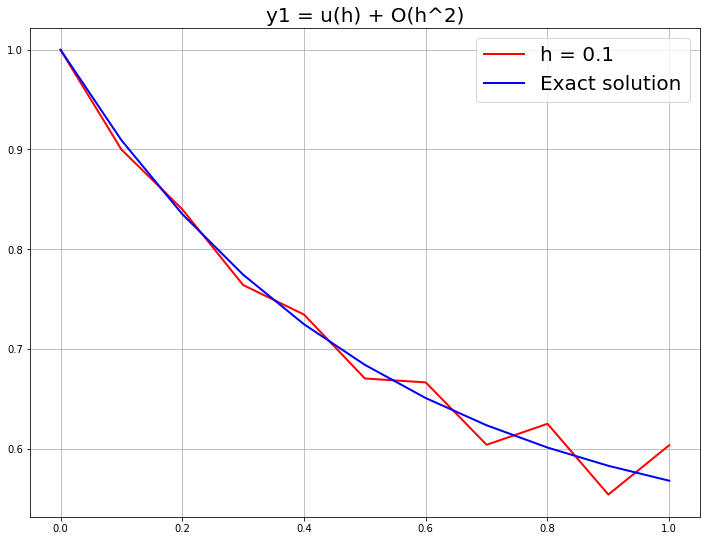

In [9]:
make_graph(Iter, Exact, 0.1, 1 - 0.1, "y1 = u(h) + O(h^2)")

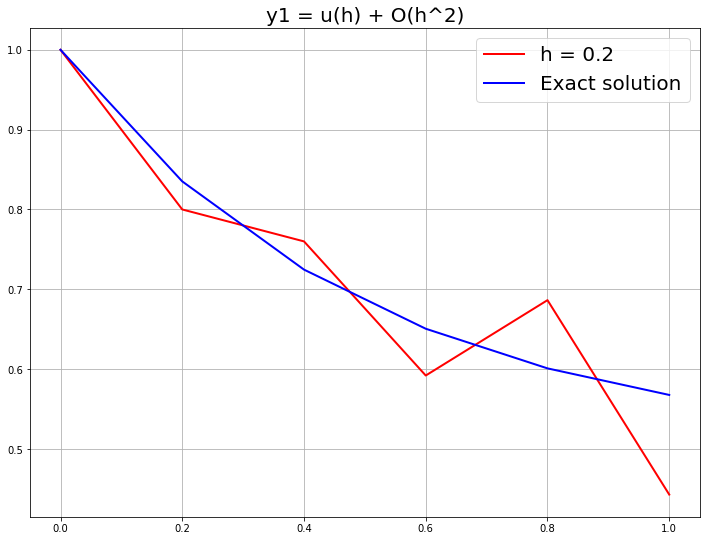

In [10]:
make_graph(Iter, Exact, 0.2, 1 - 0.2, "y1 = u(h) + O(h^2)")

Быстрые осцилляции численного решения часто указывают на отсутствие аппроксимации (согласно книге Федоренко)

Для начального приближения в виде $y_1 = u(h)$ (без разложения по формуле Тейлора):

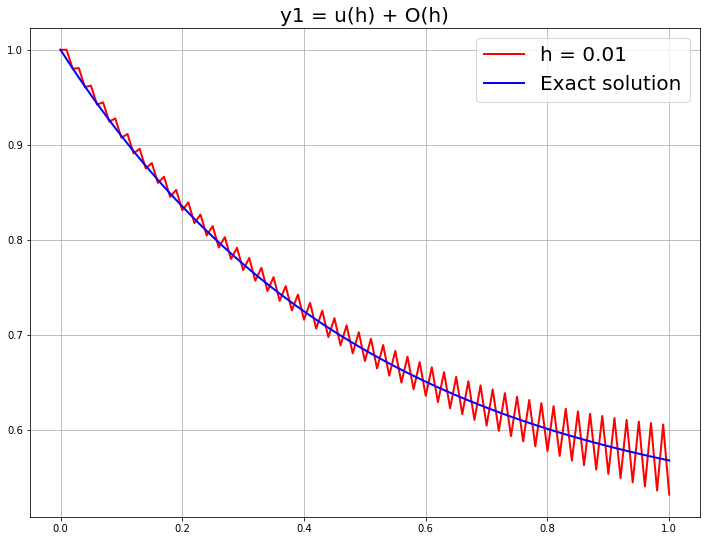

In [11]:
make_graph(Iter, Exact, 0.01, 1, "y1 = u(h) + O(h)")

Для начального приближения $y_1 = u(h)$ (точно):

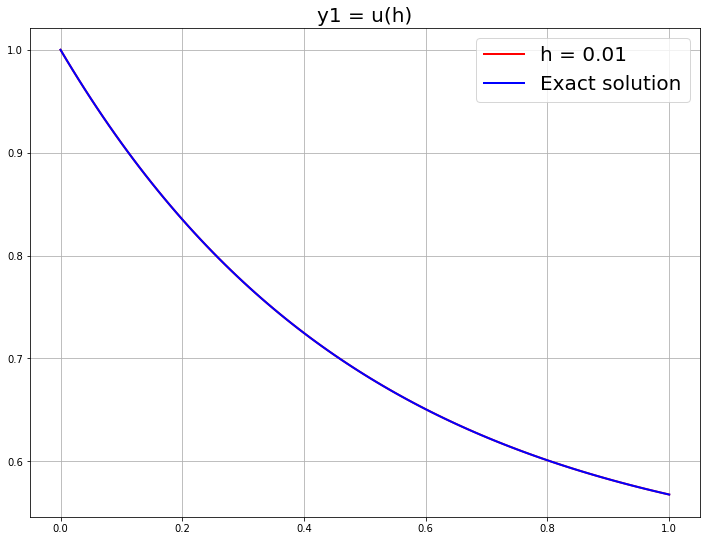

In [12]:
make_graph(Iter, Exact, 0.01, 0.5 * (1 + np.exp(-2 * 0.01)), "y1 = u(h)")

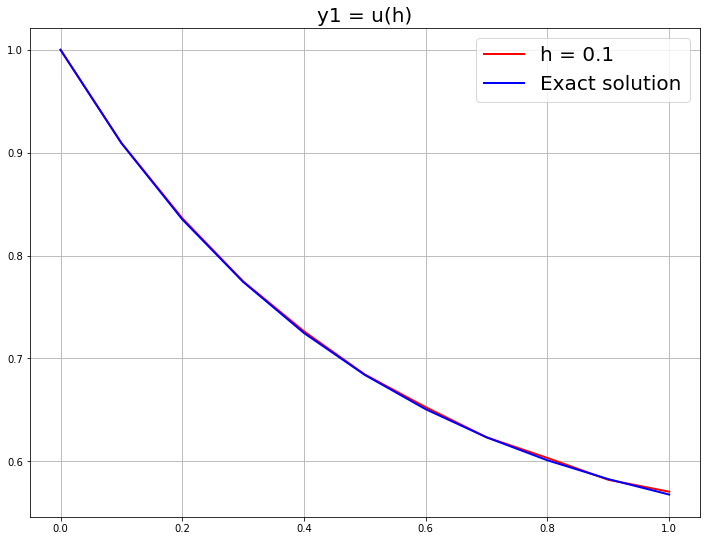

In [15]:
make_graph(Iter, Exact, 0.1, 0.5 * (1 + np.exp(-2 * 0.1)), "y1 = u(h)")

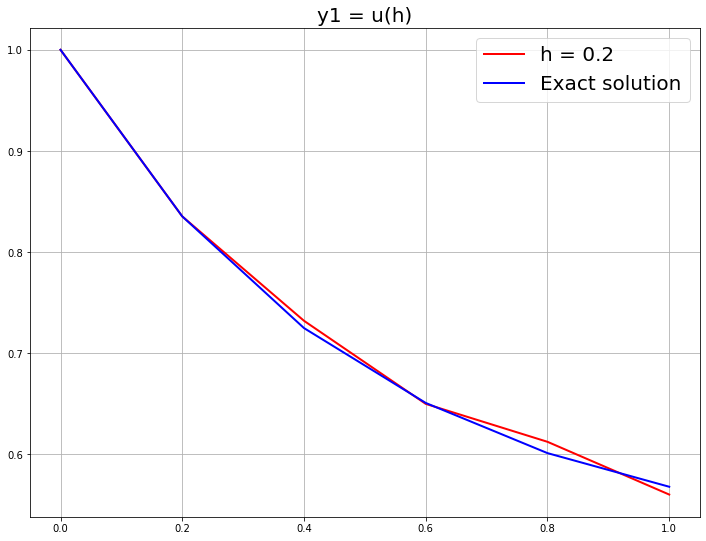

In [16]:
make_graph(Iter, Exact, 0.2, 0.5 * (1 + np.exp(-2 * 0.2)), "y1 = u(h)")

# Задание начального приближения посредством убывающего на бесконечности решения рекуррентного уравнения

Как и просят в условии, зададим значение $y_1$ как значение убывающего на бесконечности решения рекуррентного
уравнения, задающего данную схему, с заданным начальным условием $y_0 = 1$. Нетрудно найти, что это решение для заданного шага $h$:
    
$$
        y_n = (-2 h + \sqrt{4 h^2 + 2 h + 1})^n
$$

Как просят нас в условии, попробуем решать уравнение, задавая начальное условие $y_1$ как значение на этом решении. Результаты приведены ниже.

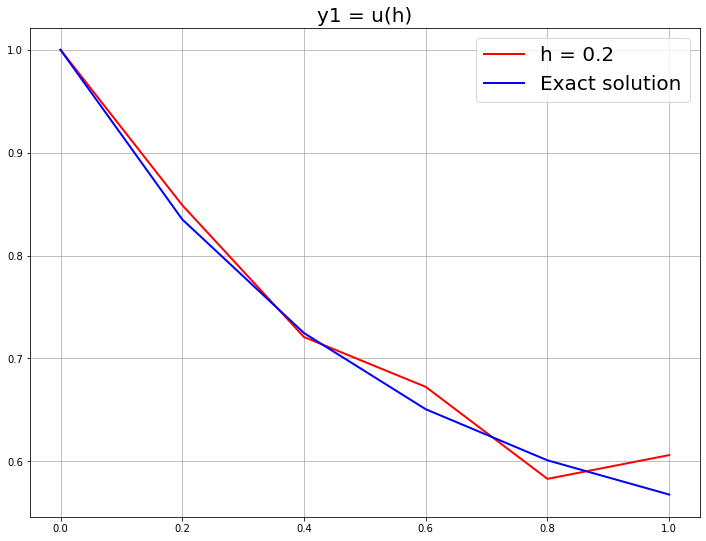

In [7]:
make_graph(Iter, Exact, 0.2, -2 * 0.2 + np.sqrt(1 + 2 * .2 + 4 * 0.04), "y1 = \lambda")

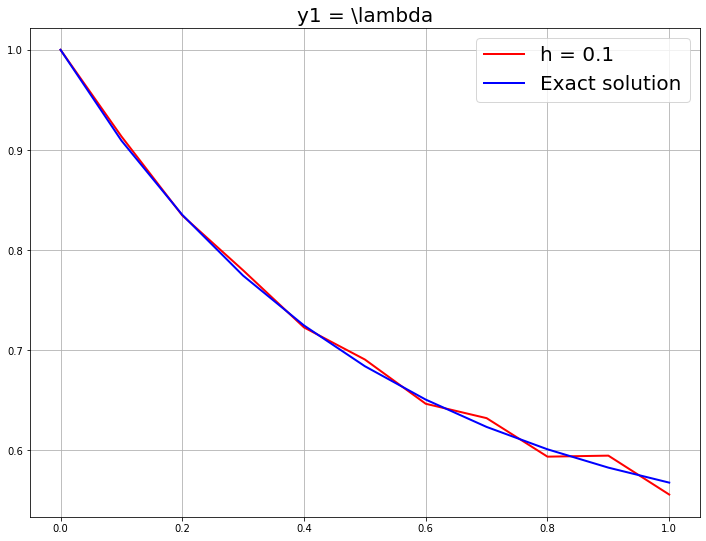

In [8]:
make_graph(Iter, Exact, 0.1, -2 * 0.1 + np.sqrt(1 + 2 * .1 + 4 * 0.01), "y1 = \lambda")

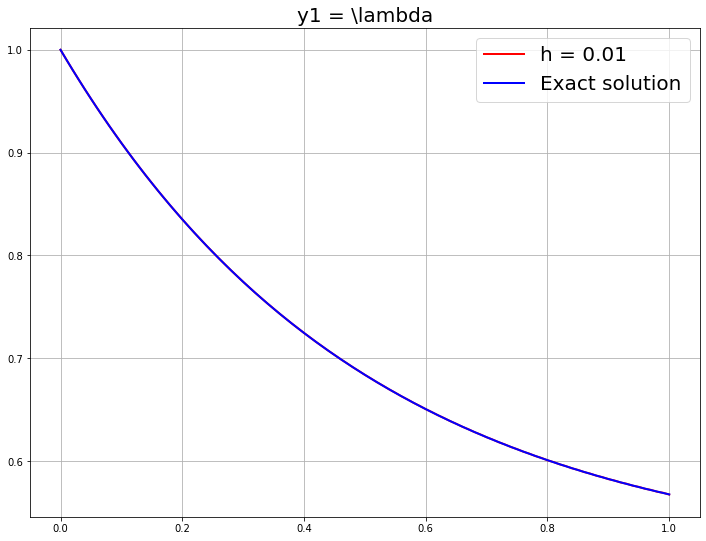

In [10]:
make_graph(Iter, Exact, 0.01, -2 * 0.01 + np.sqrt(1 + 2 * .01 + 4 * 0.0001), "y1 = \lambda")

# Вывод

Аппроксимация решения многошаговыми схемами очень сильно зависит от правильного выбора начального приближения. 
Для больших шагов лучше задавать по приближенной формуле с достаточной степенью точности по $h$, равной порядку аппроксимации разностной схемой дифференциальной задачи. Даже маленькие ошибки в задании начального приближения (выше степени аппроксимации разностной схемы) ведут к отсутствию аппроксимации.